# Sistemas Lineales

## Contenido
* [Semana 1](#Gauss): Métodos directos: Gauss con y sin pivote. Objetivo programar Gauss sin pivote
* [Semana 2](#LU): Métodos directos: LU con y sin pivote. Resolver a través del módulo de scipy y/o numpy.
* [Semana 3](#Aplicacion): Aplicación de métodos directos: Determinante. Inversa. Interpolacion polinómica a través del método algebráico. Construir la matriz de Vandermonde y resolver el sistema lineal. Coste computacional Gaus vs LU. Perturbación del sistema lineal. Normas matriciales.
* [Semana 4](#MI): Métodos iterativos: Gradiente conjugado, Gauss y Gauss Seidel.

## Introducción a los sistemas lineales

Definimos un sistema lineal como un sistema con $m$ ecuaciones lineales y $n$ incógnitas, este puede ser escrito de la siguiente manera:

\begin{align}
{\left\{{\begin{matrix}a_{11}x_{1}&+a_{12}x_{2}&+\dots &+a_{1n}x_{n}&=b_{1}\\a_{21}x_{1}&+a_{22}x_{2}&+\dots &+a_{2n}x_{n}&=b_{2}\\\dots &\dots &\dots &\dots &\dots \\a_{m1}x_{1}&+a_{m2}x_{2}&+\dots &+a_{mn}x_{n}&=b_{m}\end{matrix}}\right.}
\end{align}

Donde ${ x_{1},\dots ,x_{n}}$ son las incógnitas y los números ${ a_{ij}\in \mathbb {K} }$ son los coeficientes del sistema sobre el cuerpo ${ \mathbb {K} \ [=\mathbb {R} ,\mathbb {C} ,\dots ]}$ ${ \mathbb {K} \ [=\mathbb {R} ,\mathbb {C} ,\dots ]}$. El sistema se puede escribir con notación matricial:
<br><br>
\begin{align}
{ {\begin{pmatrix}a_{11}&a_{12}&\cdots &a_{1n}\\a_{21}&a_{22}&\cdots &a_{2n}\\\vdots &\vdots &\ddots &\vdots \\a_{m1}&a_{m2}&\cdots &a_{mn}\end{pmatrix}}{\begin{pmatrix}x_{1}\\x_{2}\\\vdots \\x_{n}\end{pmatrix}}={\begin{pmatrix}b_{1}\\b_{2}\\\vdots \\b_{m}\end{pmatrix}}}
\end{align}
<br><br>
Si representamos con notación matricial compacta:
\begin{align}
\mathbf {Ax} =\mathbf {b}
\end{align}
<br><br>
Donde $A$ es una matriz $m$ por $n$, $x$ es un vector columna de longitud $n$ y $b$ es otro vector columna de longitud $m$. La matriz A se llama matriz de coeficientes de este sistema lineal. A $b$ se le llama vector de términos independientes del sistema y a $x$ se le llama vector de incógnitas o solución.

A continuación definimos la matriz, $A$ y el vector $b$ del sistema lineal e inicializamos el vector de incógnitas, $x$:

In [85]:
import pprint
import numpy as np

#Define el sistema compuesto por la matriz A y el vector b
    # 1: Sistema para resolver sin Pivote - Solución: x= [-2.  2. -3.  3.]
    # 2: Sistema para resolver con Pivote - Solución: x= [1. 1. 1. 1.]
    # 3: Sistema para resolver con Pivote - Solución: x= [ 1.  2. -1.  1.]
    # 4: Sistema para comparar tiempos computaciones
sistema = 2

if sistema == 1:
    A = np.matrix([[2.0, 3.0, 4.0, 5.0], [6.0, 15.0, 19.0, 23.0],[8.0, 42.0, 60.0, 70.0],[12.0, 60.0, 1.0, 17.0]]) 
    b = np.array([5.0, 30.0, 98.0, 144.0])
elif sistema == 2:    
    A = np.matrix([[1.0, 1.0, -1.0, 0.0], [1.0, 1.0, 0.0, -1.0],[-1.0, 0.0, 1.0, 1.0],[0.0, -1.0, 1.0, 1.0]]) #Sistema para resolver con Pivote
    b = np.array([1.0, 1.0, 1.0, 1.0]) 
elif sistema == 3:    
    A = np.matrix([[10.0, -1.0, 2.0, 0.0], [-1.0, 11.0, -1.0, 3.0],[2.0, -1.0, 10.0, -1.0],[0.0, 3.0, -1.0, 8.0]]) #Sistema para resolver con Pivote
    b = np.array([6.0, 25.0, -11.0, 15.0]) #Sistema para resolver con Pivote
elif sistema == 4:
    A = np.random.rand(1000, 1000)
    b = np.random.rand(1000, 1)


#Dimensión del sistema
n = len(b)

print('La matriz A del sistema es:\n', A)
print('El vector b es:\n', b)
print('El sistema tiene una dimension de n =', n)


La matriz A del sistema es:
 [[ 1.  1. -1.  0.]
 [ 1.  1.  0. -1.]
 [-1.  0.  1.  1.]
 [ 0. -1.  1.  1.]]
El vector b es:
 [1. 1. 1. 1.]
El sistema tiene una dimension de n = 4



## Métodos directos

Aquellos que por medio de operaciones elementales entre filas, nos permiten transformar al sistema original en otro sistema equivalente, de forma tal de poder despejar facilmente los valores de las incógnitas.

Son 'exactos', no tienen asociado error de truncamiento pero si de redondeo, y son usados cuando la mayoría de los coeficientes de $A$ son distintos de cero y las matrices no son demasiado grandes. Suelen ser algoritmos complicados de implementar. A continuación listamos algunos de los métodos directos:

* [Gauss](#Gauss): Se divide en dos etapas, triangulación inferior y sustitución.
* [Gauss-Jordan](#GaussJordan): Similar a Gauss, pero añade una triangulación superior, obteniendo una matriz diagonal dando directamente la solución del sistema.
* [Factorización LU](#LU): Requiere una factorización de la matriz $A$ para posteriormente resolver el sistema en dos pasos.


> ### Gauss  <a id='Gauss'></a>

>Parte de la matriz ampliada del sistema $Ab$ y el algoritmo se divide en dos partes:

>* $\textit{Triangulación}$: Converte la matriz $A$ en matriz triangular superior a través de la eliminación Gaussiana. Mediante operaciones elementales se busca un sistema equivalente con ceros por debajo de la diagonal principal.
>* $\textit{Sustitución}$: Resuelve los coefientes del vector solución. Se despeja el valor de cada incógnita empezando en la última ecuación utilizando los previamente calculados.

> A continuación se introduce la implementación del método de Gauss:


In [86]:
def Gauss(A, b):
    #Dimensión del sistema
    n = len(b)
    #Matriz ampliada
    Ab = np.c_[A,b] #Usamos la funcion stack column 
                    #que permite añadir una columna extra.
    x = np.zeros(n)
                

    # print('La matriz Ab del sistema es:\n', Ab)

    #Triangulación

    for k in range(n-1): #filas
        
        #Warning: cero en la digonal
        if Ab[k,k] < np.finfo('float').eps: 
            return('ERROR: El método de Gauss falla por encontrarnos un cero en la diagonal')

        for i in range(k+1, n): #filas debajo de i
            m = Ab[i,k]/Ab[k,k]
            Ab[i,:] = Ab[i,:] - m*Ab[k,:]

    # print('\n La matriz ampliada Ab despues de ser triangularizada:\n', Ab)

    #Sustitución

    for k in range(n-1,-1,-1):
        s = 0.0
        for i in range(k+1, n):
            s = s + Ab[k,i]*x[i]
        x[k] = (Ab[k,n] - s)/Ab[k,k]

    return x

x = Gauss(A, b)
print('\n El vector solución del sistema, x=', x)



 El vector solución del sistema, x= ERROR: El método de Gauss falla por encontrarnos un cero en la diagonal


#### Pivotaje

> Hay que tener en cuenta los posibles 0 que nos encontremos en la diagonal a la hora de triangular, por lo que habrá que introducir la $\textit{Pivotaje}$. Existen dos tipos de $\textit{Pivotes}$:

>* $\textit{Pivote parcial}$: Si $𝑎_{𝑘𝑘}=0$ se intercambia la fila $𝑘$ por aquella $𝑖>𝑘$  que cumple:  $|𝑎_{𝑖𝑘}|=max_{(𝑘<𝑙\leq 𝑛)}⁡|𝑎_{𝑙𝑘}|$
>* $\textit{Pivote total}$: Si $𝑎_{𝑘𝑘}=0$ se busca el elemento $(𝑖,𝑗)$ que cumple: $|𝑎_{𝑖j}|=max_{(𝑘<𝑠\leq 𝑛)(𝑘<𝑟\leq 𝑛)}⁡|𝑎_{sr}|$ y se intercambia la ecuación (fila) $𝑖$ por la $k$ y la variable (columna) $j$ por la $k$.  

> A continuación se introduce la implementación del método de eliminación de Gauss con Pivote parcial:


In [87]:
def Gauss_pivote(A, b):
    #Dimensión del sistema
    n = len(b)
    #Matriz ampliada
    Ab = np.c_[A,b] #Usamos la funcion stack column que permite añadir una columna extra.
    x = np.zeros(n)

    # print('La matriz Ab del sistema es:\n', Ab)

    #Triangulación

    for k in range(n-1): #filas
        #################################
        # Pivote parcial          
        max = k
        
        if abs(Ab[k,k]) < np.finfo('float').eps:
            # Hallar el índice del máximo valor
            # Método 1
            max = (k + 1) +np.argmax(abs(Ab[k+1:n,k]))
            # Método 2
            # for l in range(k+1, n):
            #     if ( abs(Ab[l,k]) > abs(Ab[max,k]) ):
            #         max = l
                    
            if max==k:
                return('Sistema incompatible')

            else:
                # Interambio de filas
                # Método 1:
                # v_piv = np.copy(Ab[k,:]) #Importante: si no usamos copy, será un "alias" y no nos servirá
                # Ab[k,:] = Ab[max,:]
                # Ab[max,:] = v_piv[:]

                # Método 2
                Ab[[k,max], :] = Ab[[max,k], :]

        ##################################

        for i in range(k+1, n): #filas debajo de i
            m = -Ab[i,k]/Ab[k,k]
            # Método 1:
            # Ab[i,:] = Ab[i,:] + m*Ab[k,:]
            # Método 2
            for j in range(n+1): #filas debajo de i
                Ab[i,j] = Ab[i,j] + m*Ab[k,j]


    # print('\n La matriz ampliada Ab después de ser triangularizada:\n', Ab)

    #Sustitución

    for k in range(n-1,-1,-1):
        s = 0.0
        for i in range(k+1, n):
            s = s + Ab[k,i]*x[i]
        x[k] = (Ab[k,n] - s)/Ab[k,k]

    return x

x = Gauss_pivote(A, b)
print('\n El vector solución del sistema, x=', x)



 El vector solución del sistema, x= [1. 1. 1. 1.]


### Gauss-Jordan   <a id='GaussJordan'></a>

Similar a Gauss, pero añade una triangulación superior, obteniendo una matriz diagonal dando directamente la solución del sistema.

In [88]:
def Gauss_Jordan_pivote(A, b):
    #Dimensión del sistema
    n = len(b)
    #Matriz ampliada
    Ab = np.c_[A,b] #Usamos la funcion stack column que permite añadir una columna extra.
    x = np.zeros(n)

    # print('La matriz Ab del sistema es:\n', Ab)

    #Triangulación inferior

    for k in range(n-1): #filas
        #################################
        # Pivote parcial          
        max = k
        if abs(Ab[k,k]) < np.finfo('float').eps:
            # Hallar el índice del máximo valor
            # Método 1
            max = (k + 1) +np.argmax(abs(Ab[k+1:n,k]))
            # Método 2
            # for l in range(k+1, n):
            #     if ( abs(Ab[l,k]) > abs(Ab[max,k]) ):
            #         max = l
            if max==k:
                return('Sistema incompatible')

            else:
                # Interambio de filas
                # Método 1:
                v_piv = np.copy(Ab[k,:]) #Importante: si no usamos copy, será un "alias" y no nos servirá
                Ab[k,:] = Ab[max,:]
                Ab[max,:] = v_piv[:]

                # Método 2
                # Ab[[k,max], :] = Ab[[max,k], :]

        ##################################

        for i in range(k+1, n): #filas debajo de k
            m = -Ab[i,k]/Ab[k,k]
            Ab[i,:] = Ab[i,:] + m*Ab[k,:]

    #Triangulación superior

    for k in range(n-1, 0,-1): #filas
        #################################
        # Pivote parcial         
        max = k
        if abs(Ab[k,k]) < np.finfo('float').eps:
          
            for l in range(k+1, n):
                if ( abs(Ab[l,k]) > abs(Ab[max,k]) ):
                    max = l
            if max==k:
                return('Sistema incompatible')

            else:
                # Interambio de filas
                # Método 1:
                v_piv = np.copy(Ab[k,:]) #Importante: si no usamos copy, será un "alias" y no nos servirá
                Ab[k,:] = Ab[max,:]
                Ab[max,:] = v_piv[:]

                # Método 2
                # Ab[[k,max], :] = Ab[[max,k], :]

        ##################################

        for i in range(k-1, -1, -1): #filas encima de k
            m = -Ab[i,k]/Ab[k,k]
            Ab[i,:] = Ab[i,:] + m*Ab[k,:]


    # print('\n La matriz ampliada Ab después de ser triangularizada superior e inferiormente:\n', Ab)

    #Sustitución directa

    for k in range(n):
        x[k] = Ab[k,n]/Ab[k,k]

    return x

x = Gauss_Jordan_pivote(A, b)
print('\n El vector solución del sistema, x=', x)




 El vector solución del sistema, x= [1. 1. 1. 1.]


### Factorización LU <a id='LU'></a>

<br><br>
La factorización LU de la matriz es una descomposición en factores de la matriz $A$ como el producto de una matriz triangular inferior (Lower) y una superior (Upper): $A=LU$
<br><br>
\begin{align}
A = \begin{pmatrix}a_{11}&a_{12}&a_{13}\\a_{21}&a_{22}&a_{23}\\a_{31}&a_{32}&a_{33}\\\end{pmatrix}
=\begin{pmatrix}1&0&0\\l_{21}&1&0\\l_{31}&l_{32}&1\\\end{pmatrix} \begin{pmatrix}u_{11}&u_{12}&u_{13}\\0&u_{22}&u_{23}\\0&0&u_{33}\\\end{pmatrix} = LU .
\end{align}
<br><br>
Existen diferentes técnicas de factorizar la matriz $A$, nos vamos a apoyar en la eliminación gaussiana. Transformamos la matriz $A$ en una matriz triangular superior $U$ anulando los elementos debajo de la diagonal. Entonces,
<br><br>
\begin{align}
L_{1}*L_{2}*...*L_{n}*A=U, 
\end{align}
<br>
donde $L_{1},L_{2},...,L_{n}$ son matrices elementales, que representan los distintos pasos de la eliminación. Luego recordando que la inversa de una matriz elemental, es otra matriz elemental tenemos que:
<br><br>
\begin{align}
A=L_{n}^{-1}*...*L_{2}^{-1}*L_{1}^{-1}*U.
\end{align}
<br><br>
Por lo que $L=L_{n}^{-1}*...*L_{2}^{-1}*L_{1}^{-1}$ siendo una matriz triangular inferior.
<br><br>
Al utilizar el método de eliminación Gaussiana nos podemos encontrar con ceros en la diagonal, por lo que utilizaremos la técnica de $\textit{Pivotaje}$.
<br><br>
Esta descomposición se usa para resolver sistemas de ecuaciones o encontrar las matrices inversas, de una manera más eficiente que el método de Gauss.
<br><br>
En el caso de que se aplique el $\textit{Pivotaje}$, esta se tendrá en cuenta a la hora de resolver el sistema o calcular la inversa. Se necesita crear la matriz de permutación, $P$, que consiste en efectuar sobre la matriz identidad, las mismas permutaciones de filas que se vayan efectuando sobre la matriz que se está triangulando por Gauss. Al mismo tiempo se efectúan las mismas permutaciones sobre los elementos subdiagonal de la matriz $L$.


### Resolución sistema lineal
Dada la ecuación matricial $Ax=LUx=b$. Los pasos para resolver el sistema son los siguientes:

* Resolvemos $Ly=Pb$ para $y$.
* Resolvemos $Ux=y$ para $x$.

Los dos sistemas lineales implicados solo requieren una sustitución ya que en ambos casos las matrices del sistema son triangulares.
Nótese que ya tenemos las matrices $L$ y $U$. La ventaja de este método es que es computacionalmente eficiente, porque podemos elegir el vector $b$ que nos parezca y no tenemos que volver a hacer la eliminación de Gauss cada vez.

In [89]:
def LU_solver(A, b):

    x = np.zeros(len(b))
    # Factorizamos A en LU
    L, U, P = Factor_LU(A)
    # Sustitución inferior  
    baux = np.matmul(P,b)  
    y = lower_solver(L, baux)
    # Sustitución superior
    x = upper_solver(U, y)

    # print('La matriz L\n', L)
    # print('La matriz U\n', U)
    # print('La matriz P\n', P)

    return x

def Factor_LU(A):
    #Dimensión del sistema
    n = len(A)
    # Inicializacion de variables
    P = np.identity(n)
    U = np.copy(A)
    L = np.zeros((n,n))

    # Triangulación
    for k in range(n):  #filas
        
        #################################
        # Pivote parcial       
        max = k
        if abs(U[k,k]) < np.finfo('float').eps:
            # Hallar el índice del máximo valor
            # Método 1
            max = (k + 1) +np.argmax(abs(U[k+1:n,k]))
            # Método 2
            # for l in range(k+1, n):
            #     if ( abs(Ab[l,k]) > abs(Ab[max,k]) ):
            #         max = l

            if max==k:
                return('Sistema incompatible')
            else:
                # Interambio de filas
                # Método 1:
                # v = np.copy(U[k,:])
                # U[k,:] = U[max,:]
                # U[max,:] = v

                # v = np.copy(P[k,:])
                # P[k,:] = P[max,:]
                # P[max,:] = v
    
                # for i in range(k):
                #     v_aux = np.copy(L[k,i])
                #     L[k,i] = L[max,i]
                #     L[max,i] = v_aux

                # Método 2:                
                U[[k,max], :] = U[[max,k], :]
                P[[k,max], :] = P[[max,k], :]
                L[[k,max], :k] = L[[max,k], :k]

            
        # Creacion de L y U
        L[k,k] = 1.0
        for i in range(k+1, n):   #filas debajo de k
            m = -U[i,k]/U[k,k]
            L[i,k] = -m
            U[i,:] = U[i,:] + m*U[k,:]

    return L, U, P            

def lower_solver(A, b):
    #Dimensión del sistema
    n = len(b)
    x = np.zeros(n)
    #Sustitución hacia abajo
    for k in range(n):
        s = 0.0
        for i in range(k):
            s = s + A[k,i]*x[i]
        x[k] = (b[k] - s)/A[k,k]
    return x

def upper_solver(A, b):
    #Dimensión del sistema
    n = len(b)
    x = np.zeros(n)    
    #Sustitución hacia arriba
    for k in range(n-1,-1,-1):
        s = 0.0
        for i in range(k+1, n):
            s = s + A[k,i]*x[i]
        x[k] = (b[k] - s)/A[k,k]
    return x    

# Llamamos al LU solver
x = LU_solver(A, b)
print('\n El vector solución del sistema, x=', x)



 El vector solución del sistema, x= [1. 1. 1. 1.]


### Error de redondeo
Con aritmética exacta el método de Gauss devuelve una solución exacta. Sin embargo, al realizar los cálculos mediante un ordenador, la aritmética es finita, por lo que en sentido estricto obtenemos una solución aproximada del sistema de ecuaciones, aunque aquí la aproximación es debida tan sólo a los errores de redondeo y su propagación a lo largo de los cálculos. En algunas ocasiones esto conducirá a errores muy reducidos (manteniéndose el orden de magnitud del error de redondeo) mientras que en otros el redondeo puede originar (debido a la propagación y amplificación de los errores de redondeo) errores enormes. Existen distintas estrategias para evitar este problema:

* $\textit{Pivote total}$: evita dividir por un valor pequeño cercano a cero, pero no siempre es efectivo.
* $\textit{Escalado de filas:}$ se elige dentro de cada fila el elemento con mayor valor absoluto y cada fila se divide por este elemento. A continuación se elige el mayor entre los cocientes y se toma esa fila como fila pivote.
* $\textit{Equilibrado de filas:}$ se divide cada fila entre el elemento de mayor valor absoluto dentro de cada fila.

### Coste computacional

Siendo $n$ la dimensión de la matriz $A$:

* Gauss: Coste Triangulación + Coste Sustitución regresiva,  $\frac{2}{3}n^{3} + n^2$
* LU: Factorización + Sustitución regresiva + Sustitución progresiva $\frac{2}{3}n^{3} + 2n^2$

Para resolver un sistema ambos métodos tienen un coste computacional similar. La ventaja del LU frente a Gauss, en cuanto a coste computacional, aparece cuando se necesita resolver diferentes sistemas lineales manteniendo la matriz $A$ y variando el vector $b$. Para un sistema de n=100

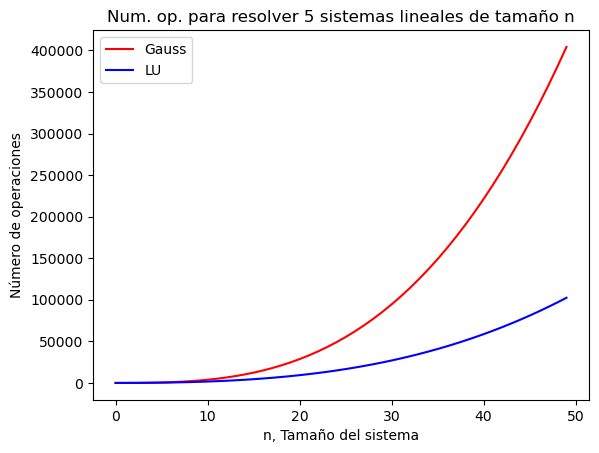

In [90]:
from matplotlib import pyplot as plt 

fig = plt.figure()

# Representaremos un rango de puntos (501) equiespaciodos entre -3 y 3
# La variable x es un vector
n = np.arange(50) #Tamaño del sistema lineal
n_sistemas = 5 #Numero de sistemas lineales a resolver

plt.title('Num. op. para resolver '+str(n_sistemas)+' sistemas lineales de tamaño n')
# Evaluamos la función seno hiperbólico en esos 501 puntos

c_gauss= n_sistemas*(pow(n,3)*2/3 + pow(n,2))

c_LU= pow(n,3)*2/3 + n_sistemas*2*pow(n,2)


# Definimos las propiedades de nuestra representación gráfica: color, tipo de línea, ...
plt.plot(n, c_gauss, color='red', label='Gauss')
plt.plot(n, c_LU, color='blue', label='LU')

plt.xlabel('n, Tamaño del sistema')
plt.ylabel('Número de operaciones')
plt.legend(loc='best')
# Finalmente damos la orden de representar el gráfico
plt.show()

## Módulos de Álgebra lineal en Python

En Python, los módulos más conocidos de Álgebra lineal son los siguientes:

* Scientific Python Linear Algebra: scipy.linalg
* Numerical Python Linear Algebra: numpy.linalg

Prueba a ejecutar los siguientes comandos para ver las funciones que contiene cada módulo:

* dir(scipy.linalg)
* dir(numpy.linalg)

Scipy.linalg contiene todas las funciones de numpy.linalg más algunas funciones avanzadas que no están incluidas en numpy.linalg. Esto implica que la eficiencia computacional sea mayor en el módulo de Numpy. Más adelante se muestra con un ejemplo práctico.

Las funciones del módulo de se compila con soporte para BLAS y LAPACK, que son librerías que incluyen rutinas para realizar operaciones numéricas de forma optimizada programadas en Fortran.


In [91]:
#import scipy
#import numpy as np

import scipy  # Scientific Python Linear Algebra
import numpy  # Numerical Python Linear Algebra

# Prueba a ejecutar los siguientes comandos para ver las funciones que contiene cada módulo:
    # dir(scipy.linalg)
    # dir(numpy.linalg)


### Resolución de sistemas lineales
A continuación vamos a ver como resolver un sistema lineal con la librería Numpy. 

#### Usando las funciones inv() y dot():

Si representamos con notación matricial compacta, $\mathbf {x} =\mathbf {A^{-1}b}$:

In [92]:
x = np.linalg.inv(A).dot(b)
print('El vector solución del sistema, x=', x)

El vector solución del sistema, x= [[1. 1. 1. 1.]]


#### Usando la función solve()

La función resuelve un sistema lineal a través del método de Factorización LU con pivote parcial.

In [93]:
x = np.linalg.solve(A,b)
print('El vector solución del sistema, x=', x)

El vector solución del sistema, x= [1. 1. 1. 1.]


### Extra: Usando la función de factorización LU de SciPy: scipy.linalg.lu()

Primero usamos la función para factorizar con pivote parcial, la cúal nos devuelve las matrices $L, U$ y $P$. A continuación resolvemos los siguientes pasos: 
> 1. Resolvemos $Ly=Pb$ para $y$.
> 2. Resolvemos $Ux=y$ para $x$.


In [94]:
# Factorización LU con pivote
P, L, U = scipy.linalg.lu(A)

print('La matriz L\n', L)
print('La matriz U\n', U)
print('La matriz P\n', P)

# Resolución del sistema lineal en dos pasos:
y =  scipy.linalg.solve_triangular(L,P.dot(b),lower=True)
x =  scipy.linalg.solve_triangular(U,y,lower=False)


print('El vector solución del sistema, x=', x)


La matriz L
 [[ 1.  0.  0.  0.]
 [-1.  1.  0.  0.]
 [ 1.  0.  1.  0.]
 [ 0. -1.  1.  1.]]
La matriz U
 [[ 1.  1. -1.  0.]
 [ 0.  1.  0.  1.]
 [ 0.  0.  1. -1.]
 [ 0.  0.  0.  3.]]
La matriz P
 [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
El vector solución del sistema, x= [1. 1. 1. 1.]


## Tiempo de computación

En este apartado vamos a comparar las funciones programadas por nosotros con las funciones de las librerias. Para ello vamos a usar un sistema lineal con un tamaño mayor.



In [95]:
# Modulo para obtener el tiempo
import time

#Definición del sistema
n = 100

An = np.random.rand(n, n)
bn = np.random.rand(n, 1)



def tiempo_ejecucion_funcion(func, *args):
    start_time = time.time()
    resultado = func(*args)
    end_time = time.time()
    tiempo = end_time - start_time
    return tiempo

#Gauss
print('Tiempo de ejecucion de los distintos métodos de resolución de sistemas lineales')
print(' Método de Gauss:',tiempo_ejecucion_funcion(Gauss, An, bn),'seg')
print(' Método de Gauss pivote:',tiempo_ejecucion_funcion(Gauss_pivote, An, bn),'seg')
print(' Método de Gauss-Jordan pivote:',tiempo_ejecucion_funcion(Gauss_Jordan_pivote, An, bn),'seg')
print(' Método de LU pivote:',tiempo_ejecucion_funcion(LU_solver, An, bn),'seg')
print(' Método de LU (Numpy):',tiempo_ejecucion_funcion(np.linalg.solve, An,bn),'seg')
print(' Método de LU (Scipy):',tiempo_ejecucion_funcion(scipy.linalg.solve, An,bn),'seg')



Tiempo de ejecucion de los distintos métodos de resolución de sistemas lineales
 Método de Gauss: 0.0 seg
 Método de Gauss pivote: 0.45986247062683105 seg
 Método de Gauss-Jordan pivote: 0.046863555908203125 seg
 Método de LU pivote: 0.03174114227294922 seg
 Método de LU (Numpy): 0.0 seg
 Método de LU (Scipy): 0.0 seg


### Aplicaciones de los métodos directos


#### Determinante de una matriz

Las matrices $L$ y $U$ pueden ser usadas para calcular el determinante de la matriz $A$ muy eficientemente porque $det(A)=det(L)det(U)$ y los determinantes de matrices triangulares son simplemente el producto de los elementos de sus diagonales. En particular, si $L$ es una matriz triangular en cuya diagonal todos los elementos son uno, entonces:
\begin{align}    
\det(A)=\det(L)\det(U)=\det(U)=\prod _{i=1}^{n}u_{ii} 
\end{align} 
La misma aproximación al problema puede ser usada para factorizaciones $LUP$ en las que aparece matrices de permutación, pues el determinante de una matriz de permutación $P$ es $(-1)^{S}$, donde $S$ es el número de permutaciones de filas en la descomposición.

In [96]:
det = 1
n = len(U)
for i in range(n):
    det = det*U[i,i]
print('El determinante de U es |U| = ',det) 

El determinante de U es |U| =  3.0


#### Inversa de una matriz
Las matrices $L$ y $U$ pueden ser usadas para calcular la matriz inversa sabiendo que $AA^{-1} = LUA^{-1} = I$, por lo que podemos obtener la inversa en dos pasos. Aplicando la sustitución inferior y superior n veces con las n columnas de la matriz identidad para obtener las n filas de la inversa de la matriz. El algoritmo quedaria de la siguiente manera:


$\textit{for i in range(n)}$:

* Resolvemos por sustitución inferior $Ly=I[i]$ para $y$.
* Resolvemos por sustitución superior $UA^{-1}[i]=y$ para $A^{-1}[i]$ que corresponde con las filas de $A^{-1}$.

In [97]:
I = np.identity(n)
Inv = np.zeros((n,n))

for i in range(n):
    y = scipy.linalg.solve_triangular(L, I[i],lower=True)
    x = scipy.linalg.solve_triangular(U,y,lower=False)
    Inv[:,i] = x

    
print('La matriz A:\n', A)
print('La matriz inversa de A:\n', Inv)
print('Comprobación de A·A^-1:\n', np.matmul(A,Inv))
   

La matriz A:
 [[ 1.  1. -1.  0.]
 [ 1.  1.  0. -1.]
 [-1.  0.  1.  1.]
 [ 0. -1.  1.  1.]]
La matriz inversa de A:
 [[ 0.33333333 -0.33333333  0.33333333  0.66666667]
 [ 0.33333333  0.66666667  0.33333333 -0.33333333]
 [-0.33333333  0.33333333  0.66666667  0.33333333]
 [ 0.66666667  0.33333333 -0.33333333  0.33333333]]
Comprobación de A·A^-1:
 [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.11022302e-16 -1.11022302e-16  1.11022302e-16  1.00000000e+00]]


### Aproximación polinómica mediante el método algebráico

El objetivo es aproximar una función ‘compleja’ por otra más sencilla, en este caso polinómica. Dado un conjunto de puntos, pueden venir con un patrón dado o no, 

Reconstruir una función a partir del valor que toma en ciertos puntos.
Estos puntos pueden venir dados con un patrón determinado o no

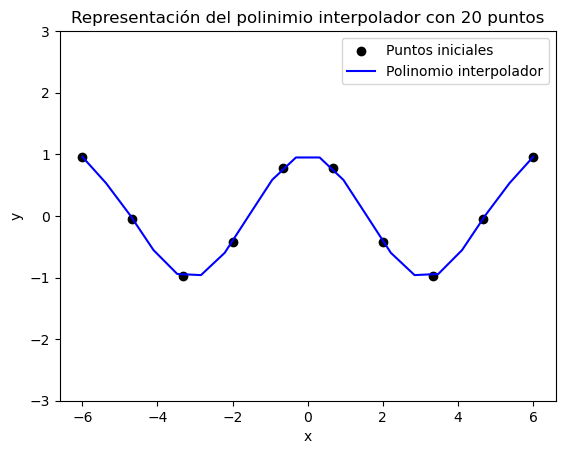

In [98]:
# Puntos para interpolar
x = np.linspace(-6, 6, 10)
y = np.cos(x)

# Matriz de Vandermonde
n = len(x)
A = np.zeros((n,n))
for i in range(n):
    for j in range(0,n):
        A[i,j] = pow(x[i],j) 

# Obtenemos los coeficientes del polinomio interpolador resolviendo el sistema lineal
a = np.linalg.solve(A,y)


#Contruccion del polinomio interpolador a partir de los coeficientes a_n
n_aprox = 20
y_aprox = np.zeros(n_aprox)
x_aprox = np.linspace(np.min(x), np.max(x), n_aprox)
for i in range(n_aprox):
    for j in range(n):
        y_aprox[i] = y_aprox[i] + a[j]*pow(x_aprox[i],j)

fig = plt.figure()

plt.title('Representación del polinimio interpolador con '+str(n_aprox)+' puntos')

# Representación gráfica
plt.scatter(x, y, color='k', label='Puntos iniciales')
plt.plot(x_aprox, y_aprox, color='blue', label='Polinomio interpolador')
plt.ylim(-3,3)

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
# Finalmente damos la orden de representar el gráfico
plt.show()

### Perturbación de sistemas lineales

Vamos a estudiar el comportamiento de un sistema lineal de ecuaciones algebráicas, $Ax = b$, a perturbaciones, $\delta$, en los datos iniciales del problemas, es decir, en la matriz $A$ o en el vector $b$.

#### Norma matricial
Antes vamos definir el concepto de norma matricial que es una extensión de la norma vectorial. Hay diferentes normas que se denotan p-normas y usualmente se denotan por $\left\|A\right\|_{p}$.
* $p=1$, la máxima suma absoluta de las columnas de la matriz:
\begin{align}    
||A||_1=\max \limits_{1\leq j\leq n}\sum_{i=1}^{n}a_{ij}.
\end{align} 

* $p=\infty$, es la máxima suma absoluta de las columnas de la matriz:
\begin{align}    
||A||_{\infty}=\max \limits_{1\leq j\leq n}\sum_{j=1}^{n}a_{ij}.
\end{align} 

#### Perturbación de $b$ en el sistema $Ax = b$
Partimos de un sistema lineal $Ax = b$ y lo perturbamos el vector $b$ con $\delta b$, el sistema perturbado quedaría:

\begin{align}    
Ax = b + \delta b
\end{align} 

Si denominamos $x_0$ a la única solución del sistema inicial ( con $x_0\neq 0$), la solución del sistema perturbado sería $x_0 + \delta x0$: 
\begin{align}    
A(x + \delta x_0) = b + \delta b \rightarrow Ax + A\delta x_0 = b + \delta b \rightarrow A\delta x_0 = \delta b \rightarrow \delta x_0 = A^{-1}\delta b  
\end{align} 

Aplicando normas de matrices, $||\,\,||$, se deduce que  $||\delta x_0|| = ||A^{-1}\delta b|| \rightarrow ||\delta x_0|| \leq ||A^{-1}||\,||\delta b||$. Y que multiplicando y dividiendo por $||A||$, $||\delta x_0|| \leq ||A^{-1}||\,\frac{||A||}{||A||}||\delta b||,$ llegamos a la siguiente expresión:


\begin{align}    
\frac{||\delta x_0||}{||x_0||} \leq ||A^{-1}||\,||A||\frac{||\delta b||}{||b||}
\end{align} 

donde ||A^{-1}||\,||A|| es el número de condición de la matriz A y se indica como $\kappa(A)$.

* Si $\kappa(A)\approx 1$, el sistema no es sensible a perturbaciones y se dice que la matriz está bien condicionada.
* Si $\kappa(A) >> 1$, el sistema es sensible a perturbaciones y se dice que la matriz está mal condicionada.

Vamos a ver con un ejemplo como afecta a la solución del sistema el condicionamiento de la matriz cuando se perturba el vector b:

\begin{align}
\begin{pmatrix} 1 & 1\\ 1 & 1.0001 \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} 2 \\ 2 \end{pmatrix} 
\end{align}




Resolviendo el sistema por el método de Gauss, vemos que la solución es $x= (2, 2)$. Ahora si perturbamos el sistema con $\delta b = (0,10^{-4})$, y volvemos a resolver el sistema, la solución es $x = (1, 1)^T$. Comprobando el número de condición, vemos que efectivamente  $\kappa(A) = 40002 >> 1$, por lo que A está mal condicionada. El número de condición de la matriz A es excesivamente grande (matriz mal condicionada), lo cual traduce el mal comportamiento del sistema incluso frente a pequeñnas perturbaciones.

In [99]:
#Ejemplo sistema mal condicionado

# Definimos el sistema
A = np.matrix([[1.0, 1.0], [1, 1.0001,]]) 
b = np.array([2.0, 2.0])

# Resolvemos el sistema
x = np.linalg.solve(A, b)
print('La solución del sistema es x=', x)

# Perturbamos un elemento de la matriz A
b += [0, 0.0001]
x = np.linalg.solve(A, b)
print('La solución del sistema perturbado en b es x=', x)

# Comprobamos el número de condición
kappa = np.linalg.norm(np.linalg.inv(A))*np.linalg.norm(A)
print('El número de condición de la matriz es kappa = ', kappa)

La solución del sistema es x= [2. 0.]
La solución del sistema perturbado en b es x= [1. 1.]
El número de condición de la matriz es kappa =  40002.00010000441


Ahora vamos a resolver otro sistema donde la solución es $x= (0.9, -1)^T$. Ahora si perturbamos el sistema con $\delta b = (0.1,0.1)^T$, y volvemos a resolver el sistema, la solución es $x = (1, -1)^T$. Comprobando el número de condición, vemos que efectivamente  $\kappa(A) = 2 \approx 1$, por lo que A está bien condicionada, lo cual traduce un
comportamiento no esencialmente distinto del paso de la solución $x= (0.9, -1)^T$ a la $x = (1, -1)^T$.

In [100]:
#Ejemplo sistema bien condicionado

# Definimos el sistema
A = np.matrix([[1.0, 1.0], [1.0, -1.0,]]) 
b = np.array([-0.1, 1.9])

# Resolvemos el sistema
x = np.linalg.solve(A, b)
print('La solución del sistema es x=', x)

# Perturbamos un elemento de la matriz A
b += [0.1, 0.1]
x = np.linalg.solve(A, b)
print('La solución del sistema perturbado en b es x=', x)

# Comprobamos el número de condición
kappa = np.linalg.norm(np.linalg.inv(A))*np.linalg.norm(A)
print('El número de condición de la matriz es kappa = ', kappa)

La solución del sistema es x= [ 0.9 -1. ]
La solución del sistema perturbado en b es x= [ 1. -1.]
El número de condición de la matriz es kappa =  2.0


#### Perturbación de $A$ en el sistema $Ax = b$
Ahora vamos a perturbar la matriz $A$ con $\delta A$, el sistema perturbado quedaría:

\begin{align}    
(A +\delta A)x = b 
\end{align} 

Si denominamos $x_0$ a la única solución del sistema inicial ( con $x_0\neq0$), la solución del sistema perturbado será $x_0 + \delta x0$, entonces de manera similar al desarrollo de la perturbación en $b$ se puede llegar a la siguiente expresión: 
\begin{align}    
\frac{||\delta x_0||}{||x_0 + \delta x_0||} \leq \kappa(A)\frac{||\delta A||}{||A||}
\end{align} 


In [101]:
#Ejemplo sistema mal condicionado

# Definimos el sistema
A = np.matrix([[1.0, 1.0], [1, 1.0001,]]) 
b = np.array([2.0, 2.0])

# Resolvemos el sistema
x = np.linalg.solve(A, b)
print('La solución del sistema es x=', x)

# Perturbamos un elemento de la matriz A
A += [[0, 0.0001],[0, 0.0001]]
x = np.linalg.solve(A, b)
print('La solución del sistema perturbado en b es x=', x)

# Comprobamos el número de condición
kappa = np.linalg.norm(np.linalg.inv(A))*np.linalg.norm(A)
print('El número de condición de la matriz es kappa = ', kappa)

La solución del sistema es x= [2. 0.]
La solución del sistema perturbado en b es x= [2. 0.]
El número de condición de la matriz es kappa =  40006.0005000044
